## Converting stan to pymc3

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pytensor
import pytensor.tensor as pt
import scipy

from matplotlib.lines import Line2D

In [2]:
seed = sum(map(ord, "RL_PyMC"))
rng = np.random.default_rng(seed)
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

* original stan code
```stan
data {
  int<lower=0> J;         // number of schools
  array[J] real y;              // estimated treatment effects
  array[J] real<lower=0> sigma; // standard error of effect estimates
}
parameters {
  real mu;                // population treatment effect
  real<lower=0> tau;      // standard deviation in treatment effects
  vector[J] eta;          // unscaled deviation from mu by school
}
transformed parameters {
  vector[J] theta = mu + tau * eta;        // school treatment effects
}
model {
  target += normal_lpdf(eta | 0, 1);       // prior log-density
  target += normal_lpdf(y | theta, sigma); // log-likelihood
}

```

In [3]:
n_school = 8  # number of schools
effect = [28, 8, -3, 7, -1, 1, 18, 12]  # estimated treatment effects
eff_sigma = [15, 10, 16, 11, 9, 11, 10, 18]

In [9]:

with pm.Model() as model:
    # data
    J = pm.Data('J', n_school)  # replace 'value' with the actual number of schools
    y = pm.Data('y', effect)  # replace 'value' with the actual estimated treatment effects
    e_sigma = pm.Data('sigma', eff_sigma)  # replace 'value' with the actual standard errors

    # parameters
    mu = pm.Normal('mu', mu=0, sigma=10)
    tau = pm.HalfNormal('tau', sigma=10)
    eta = pm.Normal('eta', mu=0, sigma=1, shape=J)

    # transformed parameters
    theta = pm.Deterministic('theta', mu + tau * eta)

    # model
    y_obs = pm.Normal('y_obs', mu=theta, sigma=e_sigma, observed=y)

    tr = pm.sample(1000, chains =1, random_seed=seed)



/home/hyunsu/miniconda3/envs/bayes/lib/python3.11/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu, tau, eta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 2 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'eta'}>, <Axes: title={'center': 'eta'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

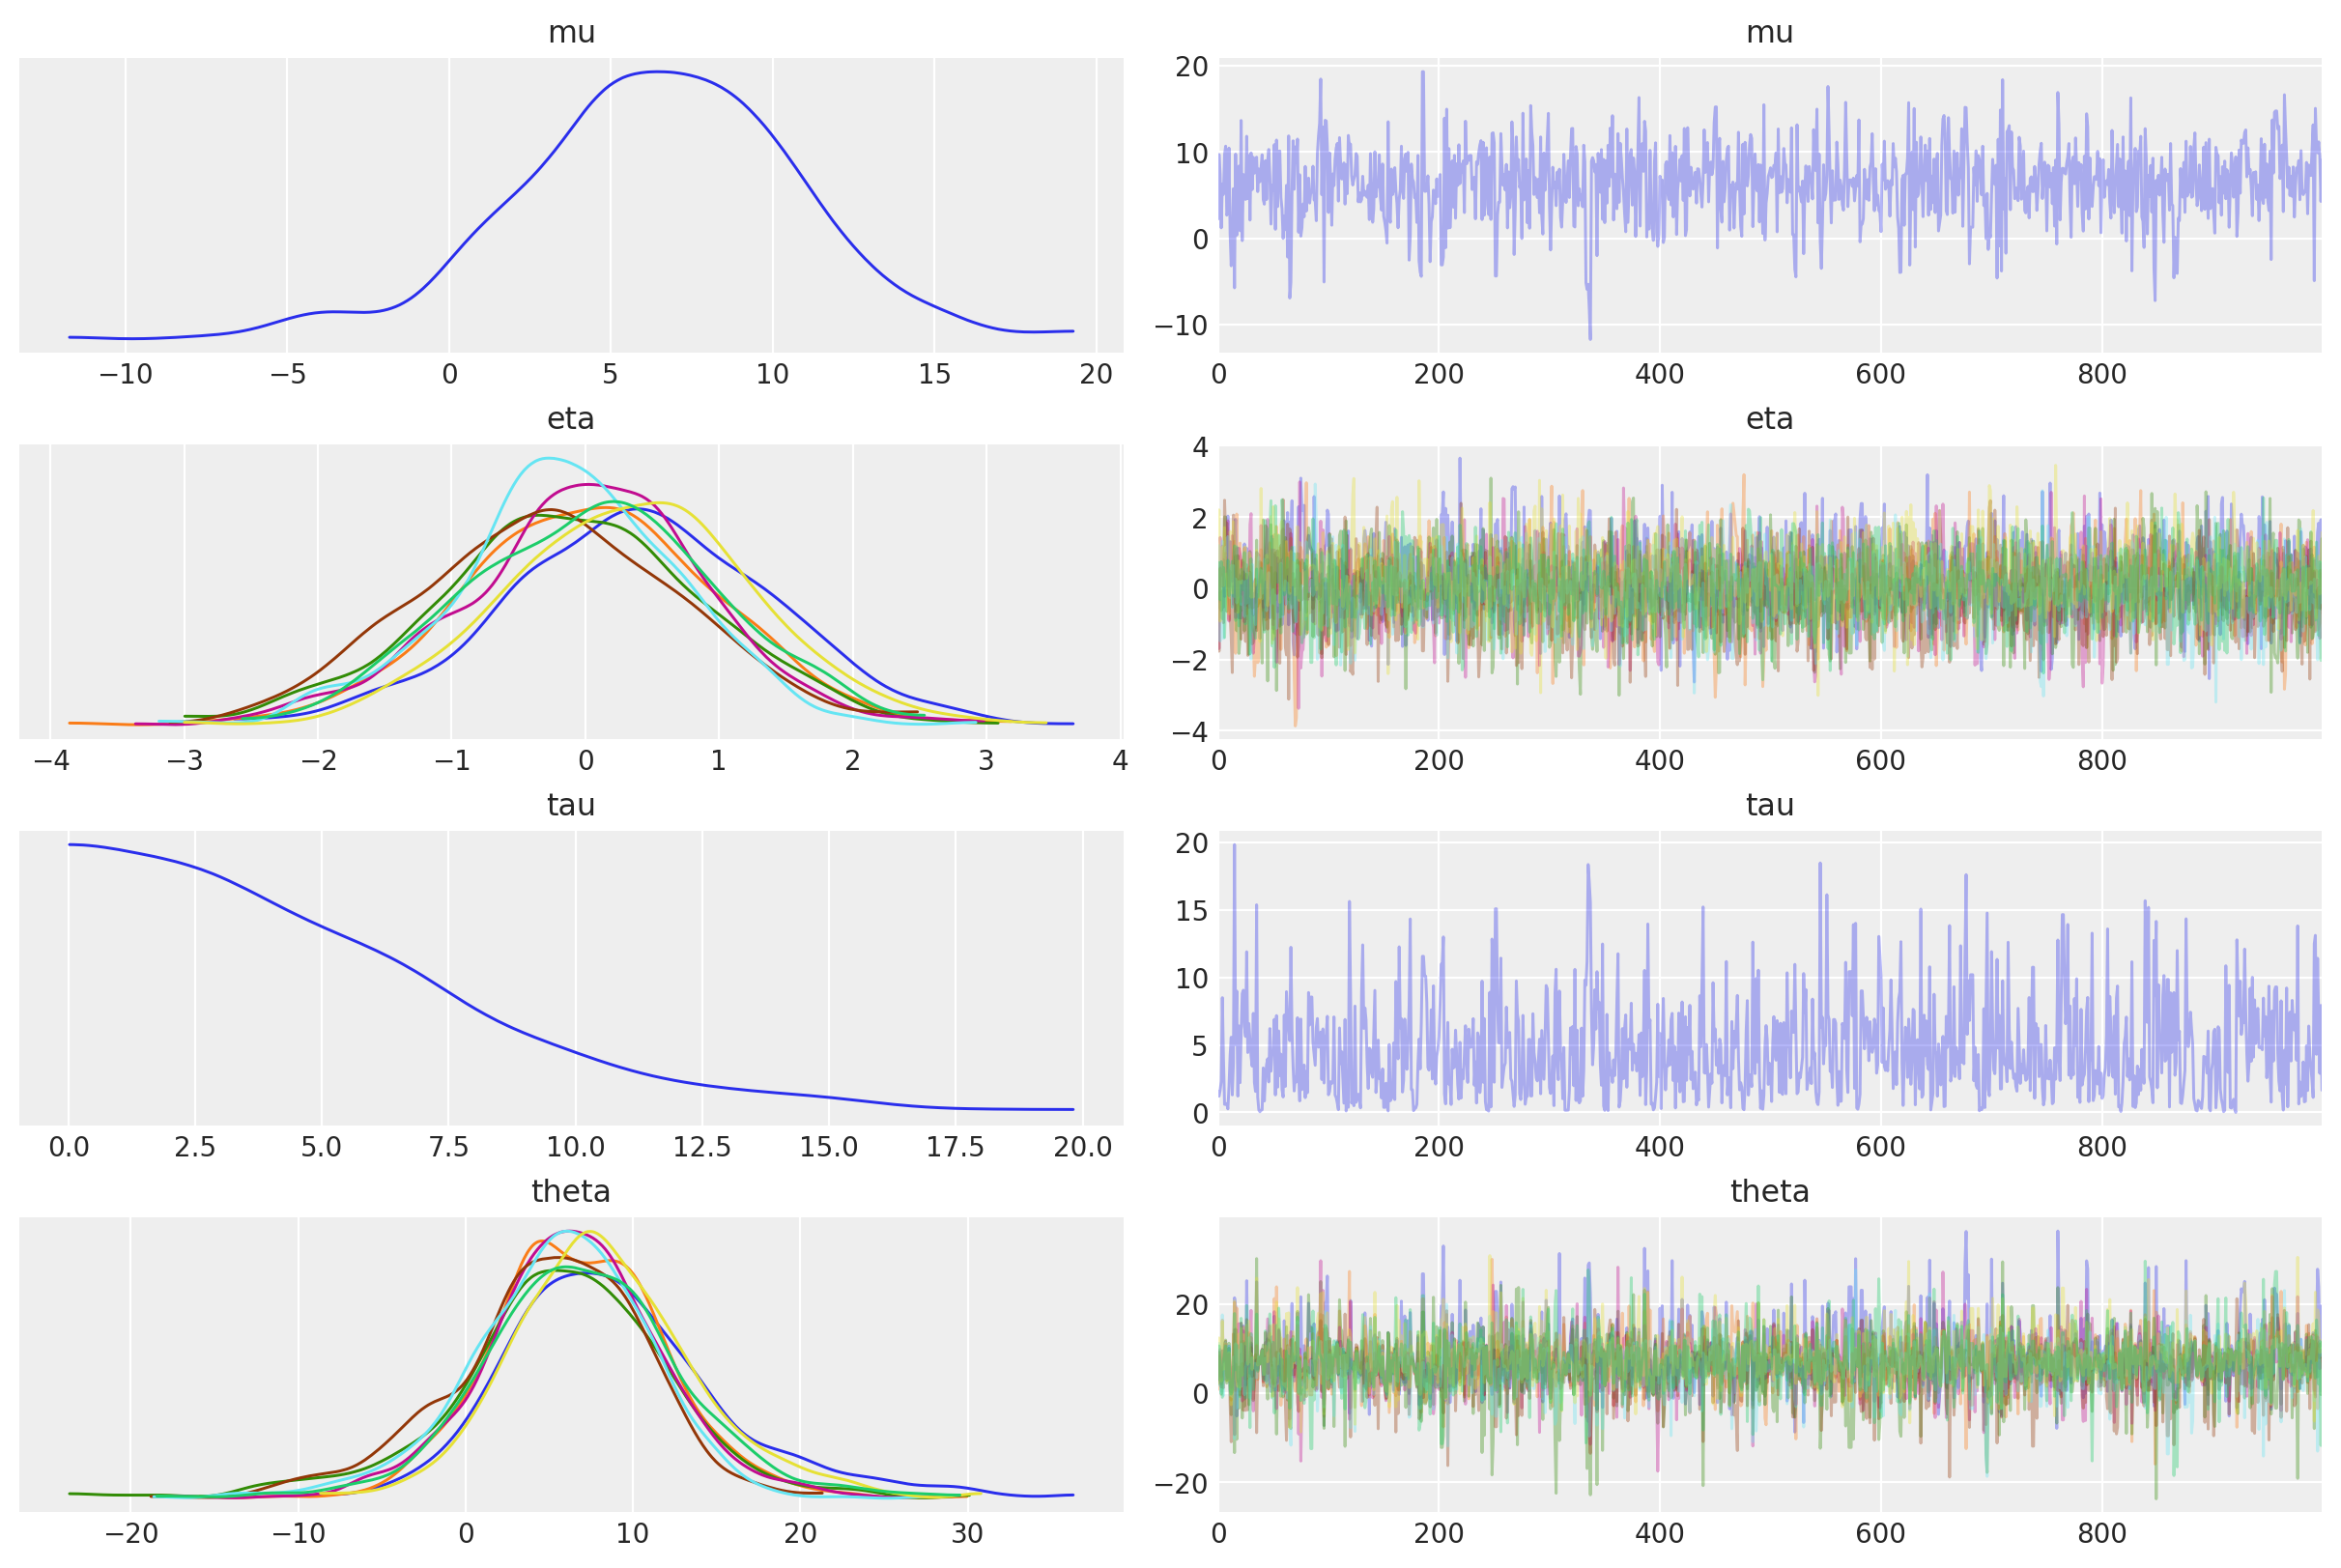

In [10]:
az.plot_trace(data=tr)

array([[<Axes: title={'center': 'mu'}>,
        <Axes: title={'center': 'eta\n0'}>,
        <Axes: title={'center': 'eta\n1'}>],
       [<Axes: title={'center': 'eta\n2'}>,
        <Axes: title={'center': 'eta\n3'}>,
        <Axes: title={'center': 'eta\n4'}>],
       [<Axes: title={'center': 'eta\n5'}>,
        <Axes: title={'center': 'eta\n6'}>,
        <Axes: title={'center': 'eta\n7'}>],
       [<Axes: title={'center': 'tau'}>,
        <Axes: title={'center': 'theta\n0'}>,
        <Axes: title={'center': 'theta\n1'}>],
       [<Axes: title={'center': 'theta\n2'}>,
        <Axes: title={'center': 'theta\n3'}>,
        <Axes: title={'center': 'theta\n4'}>],
       [<Axes: title={'center': 'theta\n5'}>,
        <Axes: title={'center': 'theta\n6'}>,
        <Axes: title={'center': 'theta\n7'}>]], dtype=object)

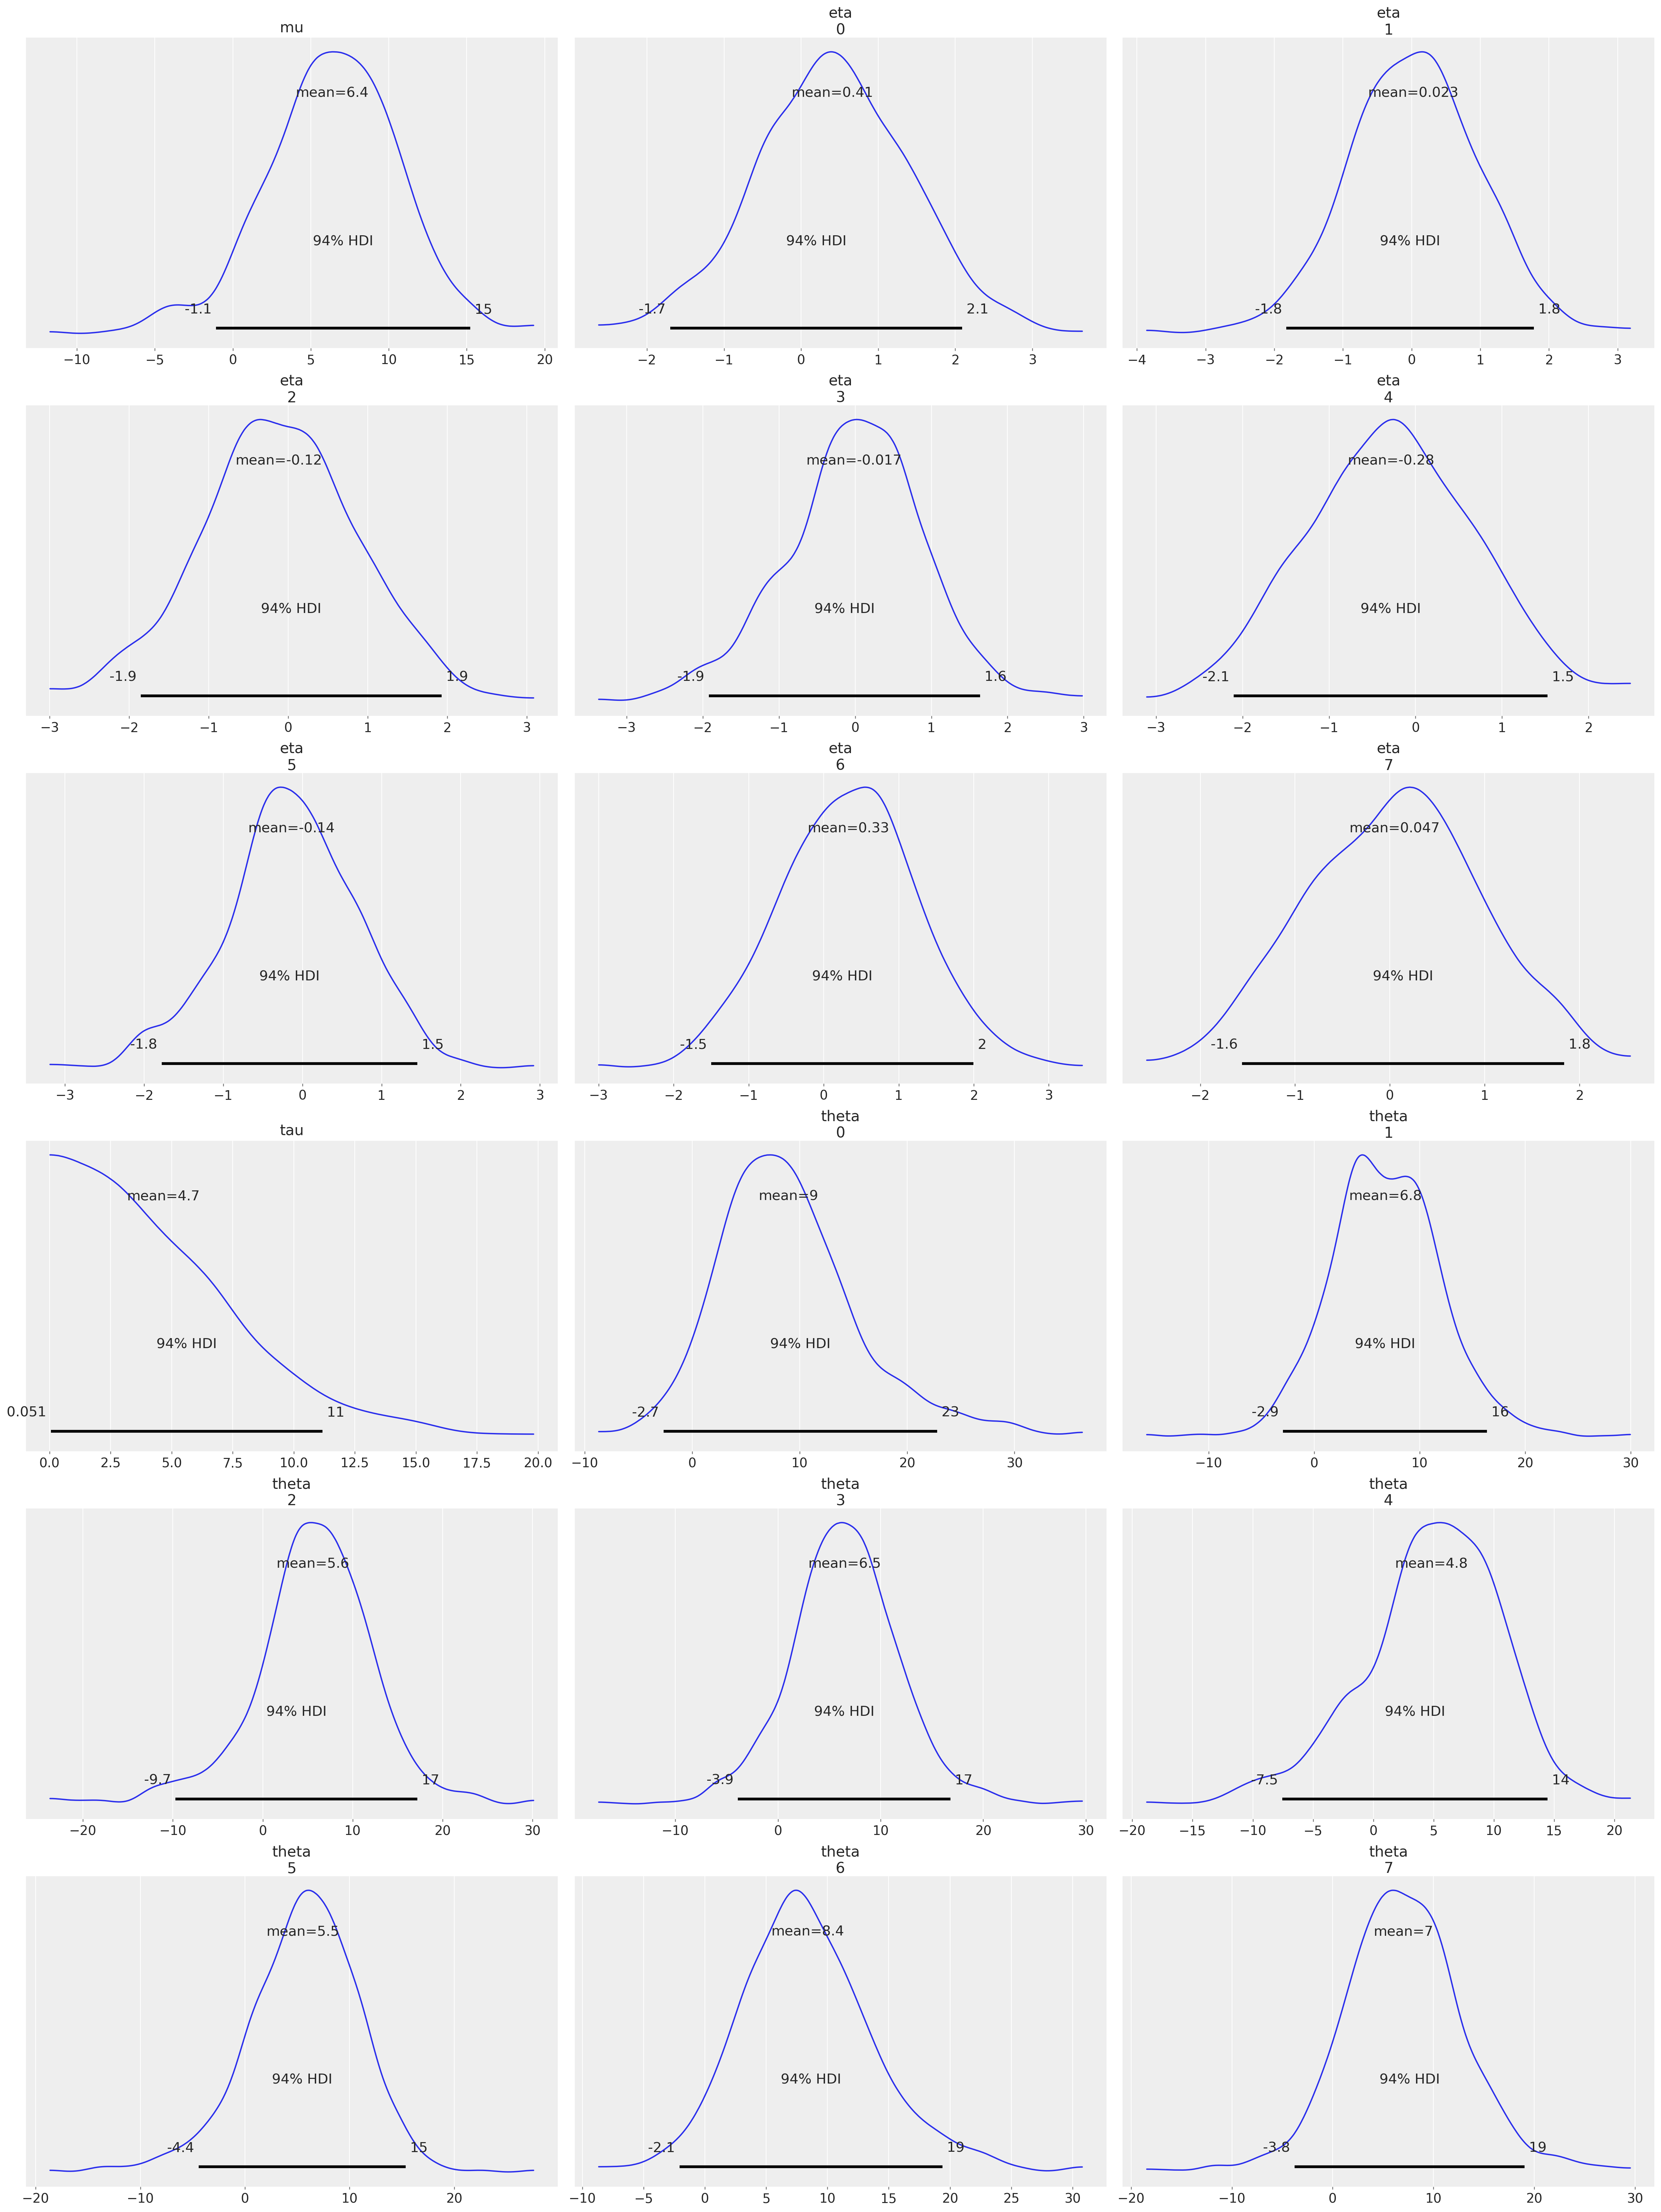

In [11]:
az.plot_posterior(data=tr)

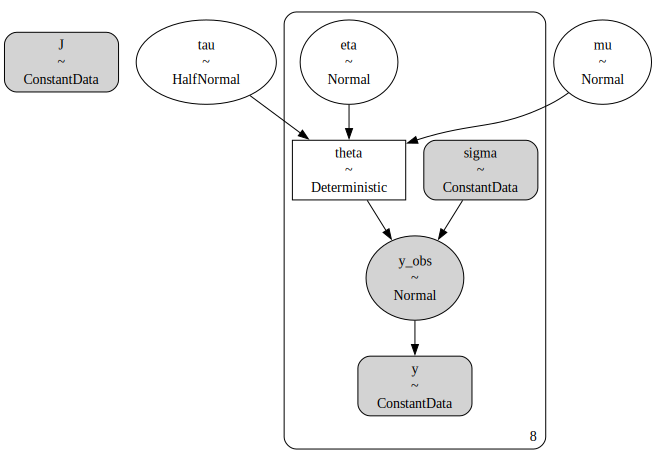

In [12]:
pm.model_to_graphviz(model)

In [15]:
tr

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data